# Proyek Analisis Data : Bike Sharing Dataset
- **Nama:** Tasya Ade Amelia
- **Email:** tasyaadeamelia03@gmail.com
- **ID Dicoding:** tasyaadeamelia

## Menentukan Pertanyaan Bisnis

1. What patterns can be observed in total bicycle rentals in various months
and specific time?
2. How big is the impact on the number of bicycle rentals during holidays compared to weekdays?
3. How much impact does the number of bicycle rentals have on weekdays compared to holidays?

## Import Semua Packages/Library yang Digunakan

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

In [193]:
# Memanggil data day dari file CSV
bike_day_df = pd.read_csv('/content/day.csv')

# Menampilkan data
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [194]:
# Memanggil data hour dari file CSV
bike_hour_df = pd.read_csv("/content/hour.csv")

# Menampilkan data
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Dataset Information

In [195]:
# Menampilkan informasi dataset dari day.csv
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil kodingan tersebut menjelaskan tentang DataFrame yang memiliki 731 baris dan 16 kolom. Setiap kolom memiliki tipe data yang berbeda, seperti int64 (integer), float64 (floating point), dan object (teks). Informasi lain yang diberikan meliputi jumlah nilai non-null untuk setiap kolom dan penggunaan memori oleh DataFrame. Kolom-kolom tersebut mungkin merepresentasikan berbagai fitur atau atribut yang terkait dengan dataset yang dimaksud, seperti tanggal, musim, hari kerja, cuaca, dan jumlah sepeda yang disewakan.

In [196]:
# Menampilkan informasi dataset dari day.csv
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Kodingan tersebut menjelaskan tentang DataFrame yang memiliki 17379 baris dan 17 kolom. Setiap kolom memiliki tipe data yang berbeda, seperti int64 (integer), float64 (floating point), dan object (teks). Informasi lain yang diberikan meliputi jumlah nilai non-null untuk setiap kolom dan penggunaan memori oleh DataFrame. Kolom-kolom tersebut mungkin merepresentasikan berbagai fitur atau atribut yang terkait dengan dataset yang dimaksud, seperti tanggal, musim, jam, hari kerja, cuaca, dan jumlah sepeda yang disewakan.


Checking Missing Value

In [197]:
# Menggunakan metode isna()
# missing_values = df.isna().sum()
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

semua kolom tidak memiliki nilai yang hilang (semua jumlahnya adalah 0), yang berarti DataFrame bike_day_df sepenuhnya lengkap tanpa nilai yang hilang.

In [198]:
# Menggunakan metode isna()
# missing_values = df.isna().sum()
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

semua kolom tidak memiliki nilai yang hilang (semua jumlahnya adalah 0), yang berarti DataFrame bike_hour_df sepenuhnya lengkap tanpa nilai yang hilang.


Checking Duplicated Data

In [199]:
# Menampilkan baris duplikat
print("Jumlah duplikasi data pada dataframe bike_day_df : ", bike_day_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe bike_hour_df : ", bike_hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe bike_day_df :  0
Jumlah duplikasi data pada dataframe bike_hour_df :  0


ni berarti bahwa tidak ada duplikasi data dalam kedua DataFrame bike_day_df dan bike_hour_df. Jumlah duplikasi data pada kedua DataFrame adalah 0, yang menunjukkan bahwa setiap baris dalam DataFrame tersebut unik dan tidak ada yang sama persis dengan yang lain. Oleh karena itu, tidak perlu mengambil tindakan lebih lanjut terkait dengan duplikasi data dalam kedua DataFrame tersebut.


Statistical Description of the Dataset

In [200]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [201]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

In [202]:
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

In [203]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [204]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

1. Correlation Matrix

<ipython-input-205-7a20dd1b6278>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bike_day_df.corr()


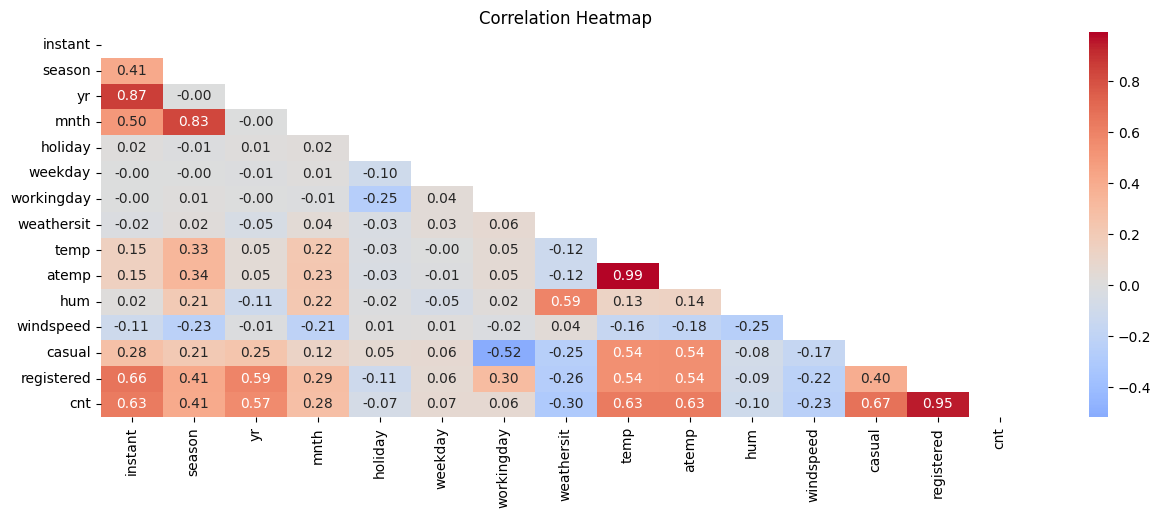

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
correlation_matrix = bike_day_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Following are the features that show a significant positive correlation:

"temp" and "atemp"
"cnt" and "registered"
"instant" and "yr"
"season" and "minth"
Features that have a strong correlation with the total number of bicycles rented ("cnt"), both daily and registered, include:

"registered"
"casual"
"atemp"
"temp"
"instant"

If the color gets bluer, it indicates that there is no significant correlation between the two features.

#### 2. Data Distribution

In [206]:
bike_day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

# Proses Decoding pada Feature yang telah terjadi proses Encoding

In [207]:
daily_categorical_data = bike_day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

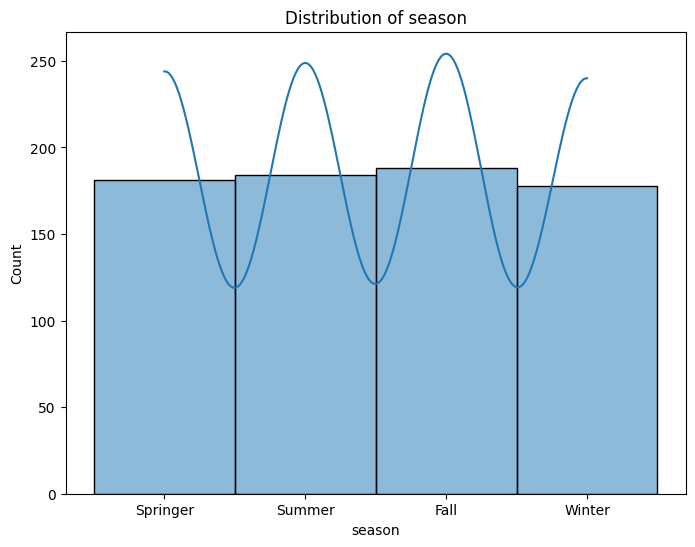

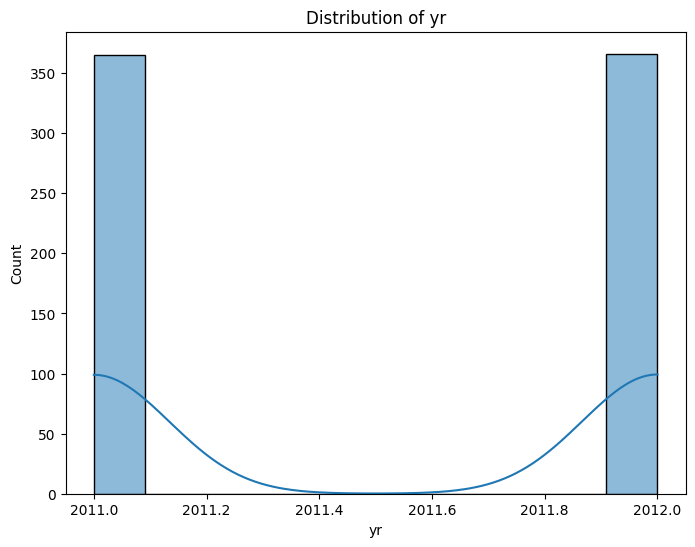

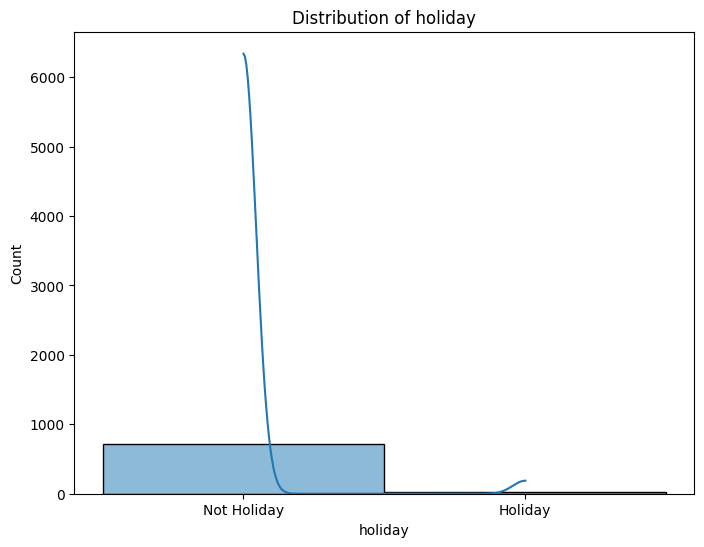

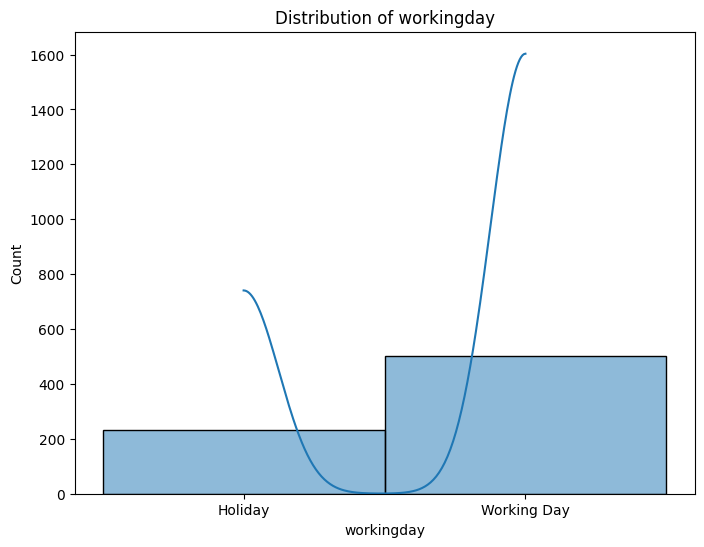

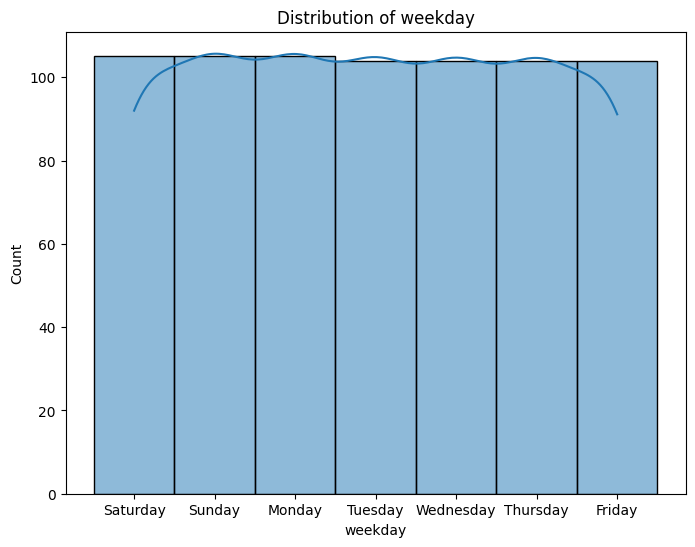

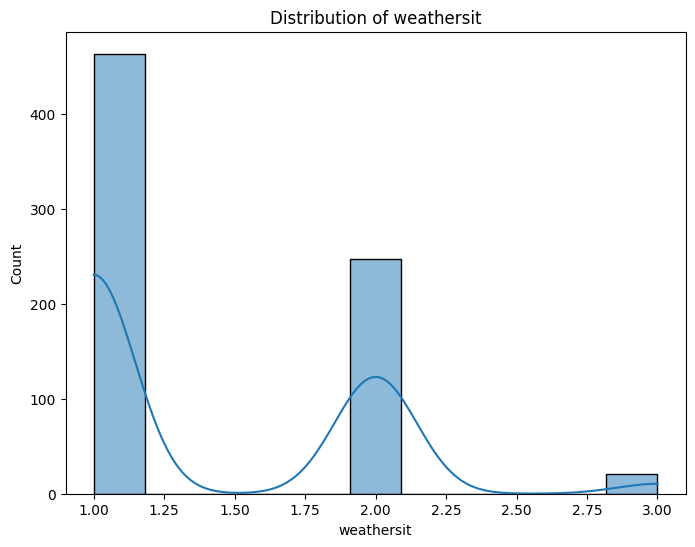

In [208]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution
- Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution
- Selain feature diatas diidentifikasi no skew Distribution

In [209]:
bike_day_df["temp"] = bike_day_df["temp"].multiply(41)
bike_day_df["atemp"] = bike_day_df["atemp"].multiply(50)
bike_day_df["hum"] = bike_day_df["hum"].multiply(100)
bike_day_df["windspeed"] = bike_day_df["windspeed"].multiply(67)

# # Proses Denormalisasi pada Feature yang telah terjadi proses Normalisasi

In [210]:
daily_num_data = bike_day_df[["temp","atemp","hum","windspeed"]]

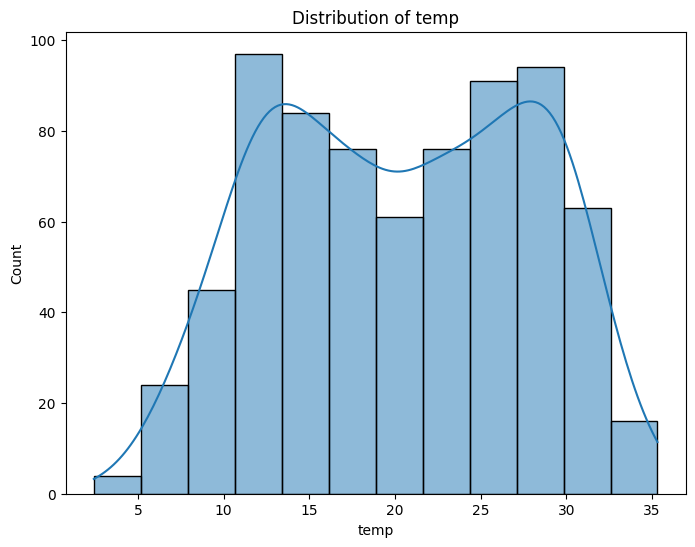

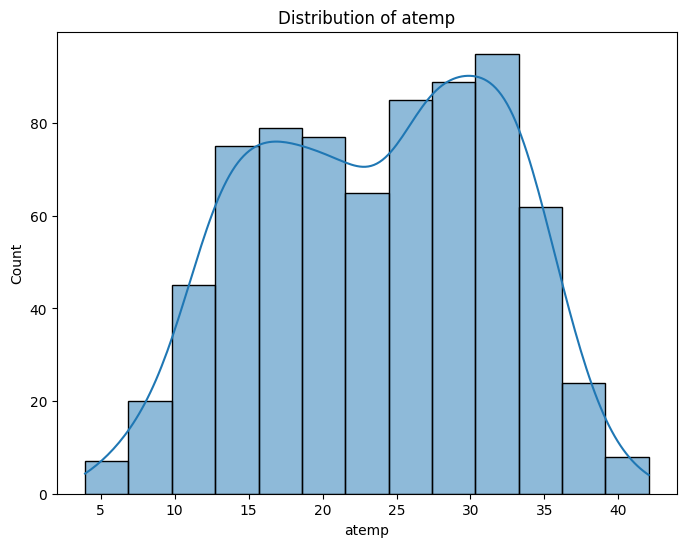

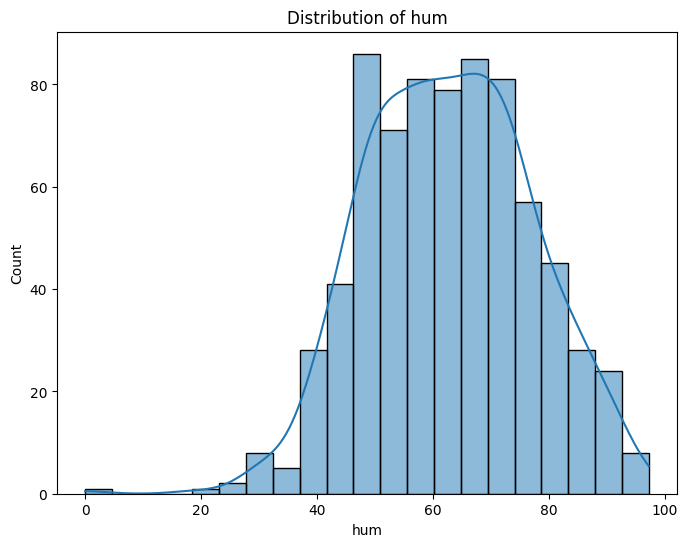

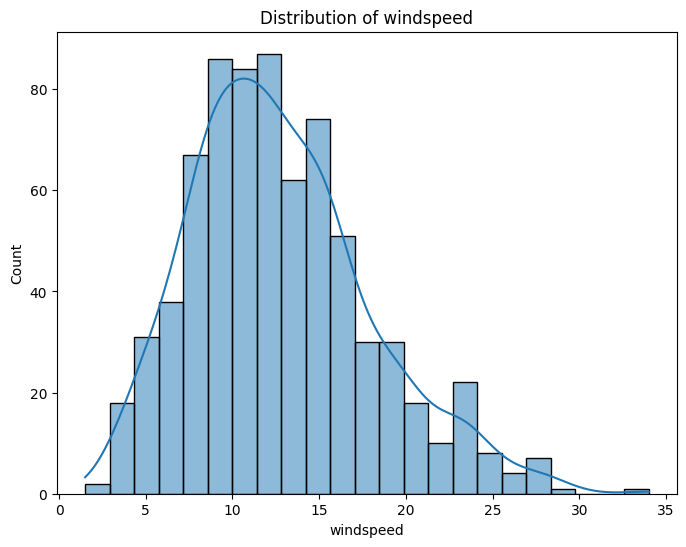

In [211]:
for column in daily_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

- Feature temp memiliki bentuk histogram yang Left Skewed Distribution
- Feature atemp memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Left Skewed Distribution
- Feature windspeed memiliki bentuk histogram yang Right Skewed Distribution

### Exploration on the "bike_hour_df"

#### 1. Correlation Matrix

In [212]:
bike_hour_df = pd.read_csv('/content/hour.csv')

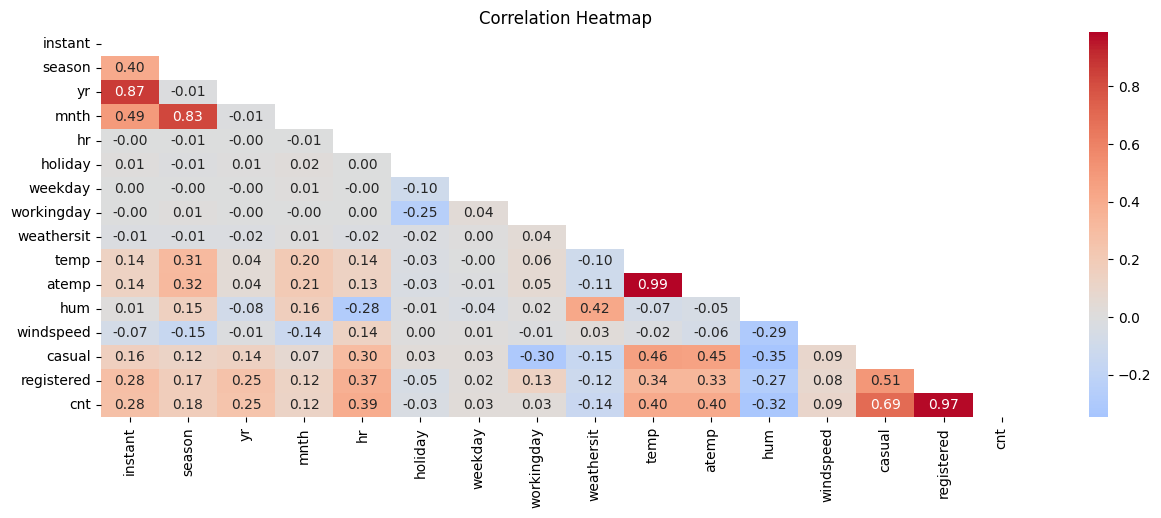

In [213]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = bike_hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The features that show a strong positive correlation are:

Actual temperature (“temp”) is strongly positively correlated with perceived temperature (“atemp”).
The total number of bicycles rented ("cnt") is strongly positively correlated with the number of bicycles rented by registered users ("registered").
The instant number ("instant") is strongly positively correlated with the year ("yr").
The season (“season”) is strongly positively correlated with the month (“minth”).
Features that have a strong correlation with the total number of bikes rented ("cnt"), including daily and registered rentals, are:

Number of bicycles rented by registered users.
Number of bicycles rented by regular users ("casual").
If the color becomes bluer, it indicates that the two features have no significant relationship or correlation.

#### 2. Data Distribution

In [214]:
bike_hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [215]:
hour_categorical_data = bike_hour_df[["season","yr","holiday","workingday","weekday","weathersit"]]

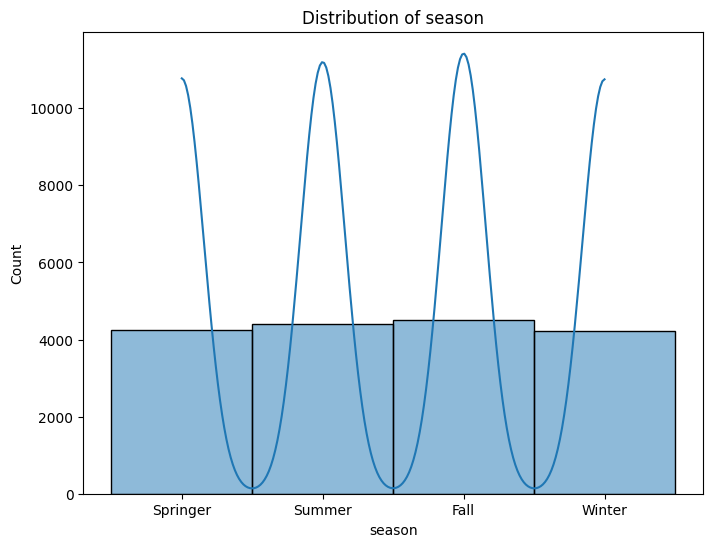

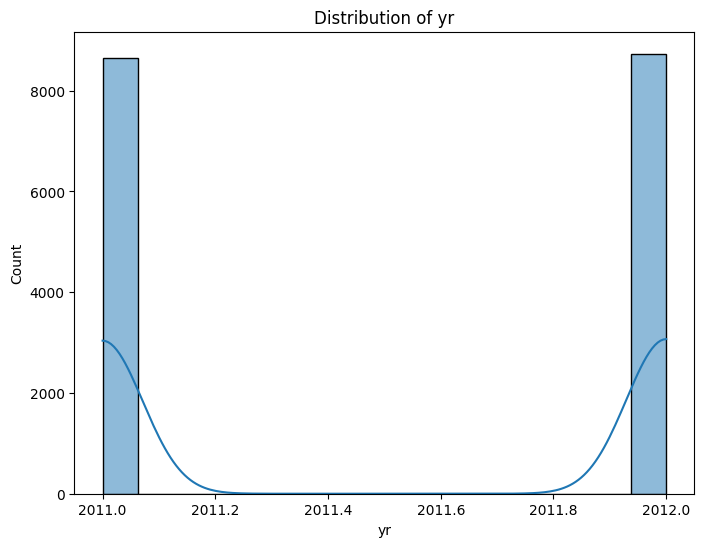

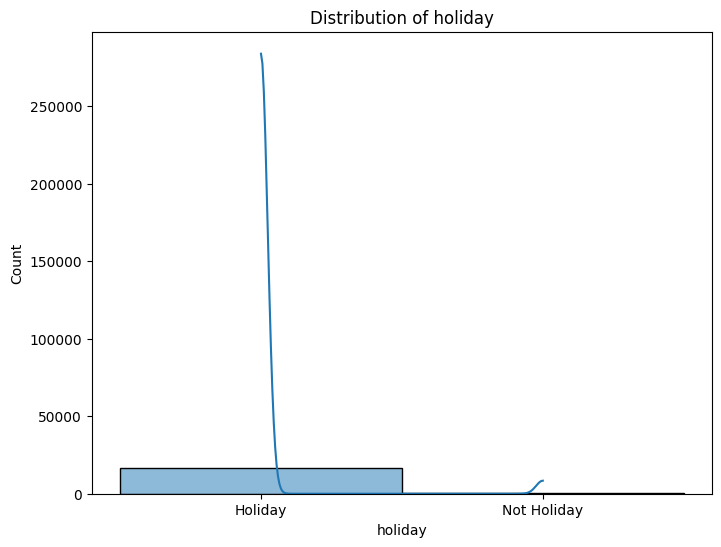

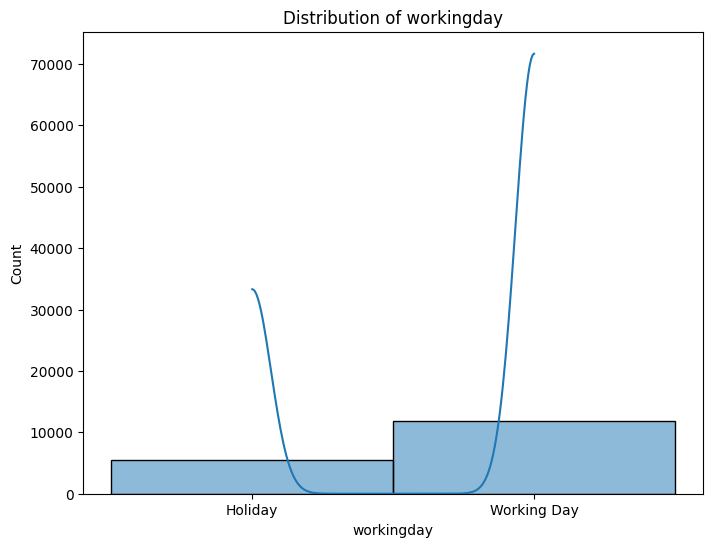

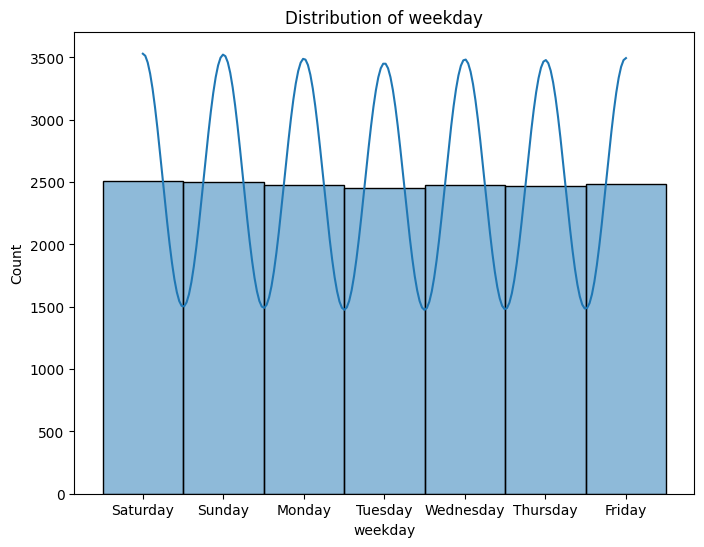

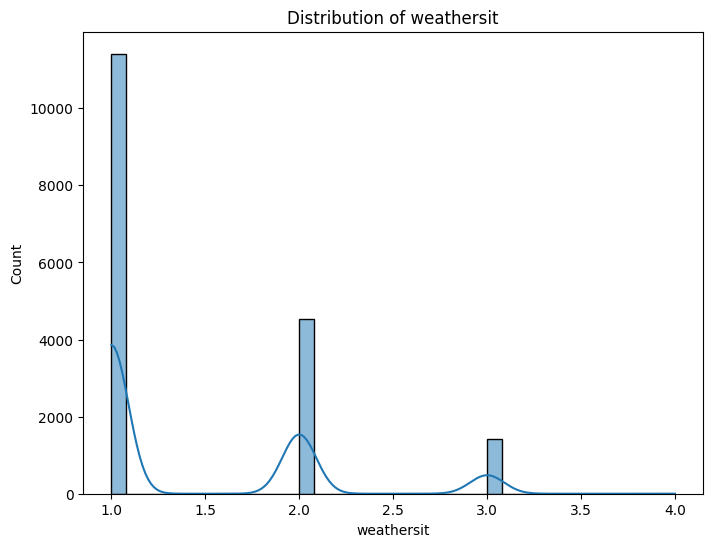

In [216]:
for column in hour_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(hour_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [217]:
bike_hour_df["temp"] = bike_hour_df["temp"].multiply(41)
bike_hour_df["atemp"] = bike_hour_df["atemp"].multiply(50)
bike_hour_df["hum"] = bike_hour_df["hum"].multiply(100)
bike_hour_df["windspeed"] = bike_hour_df["windspeed"].multiply(67)

In [218]:
hour_num_data = bike_hour_df[["temp","atemp","hum","windspeed"]]

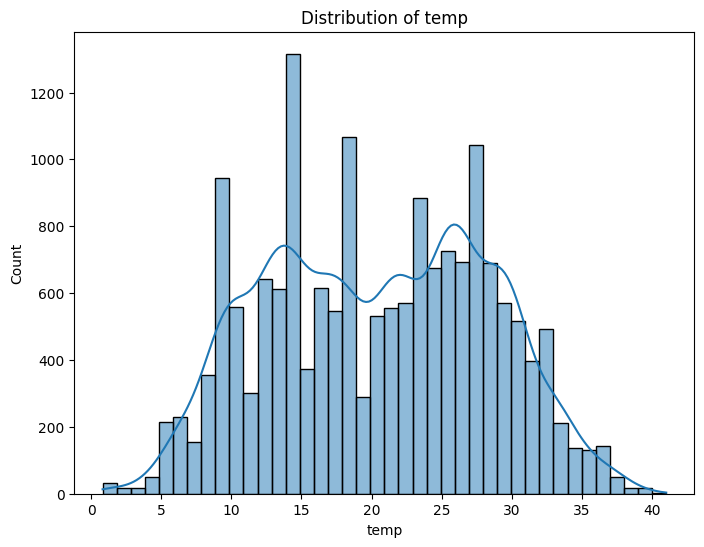

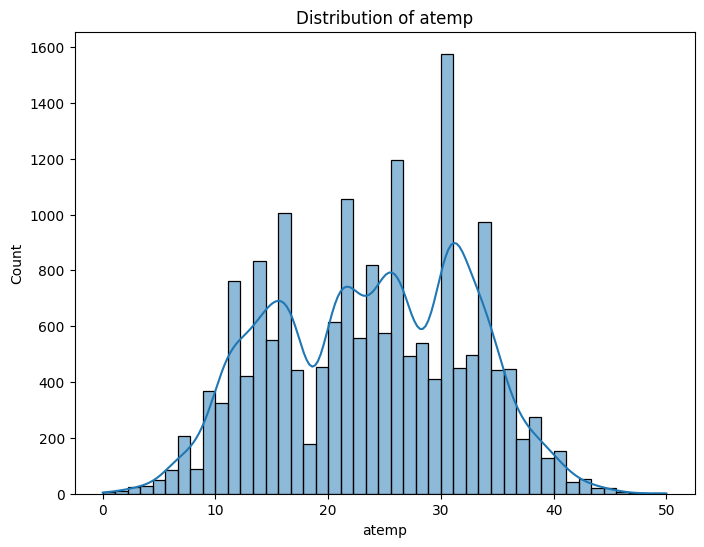

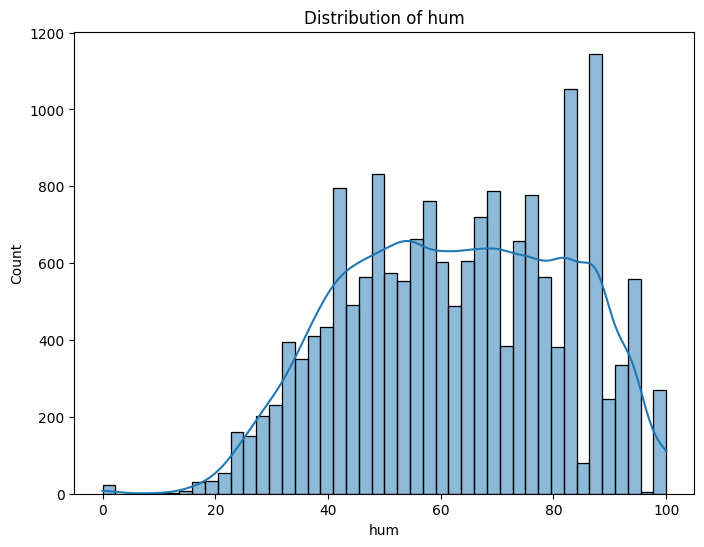

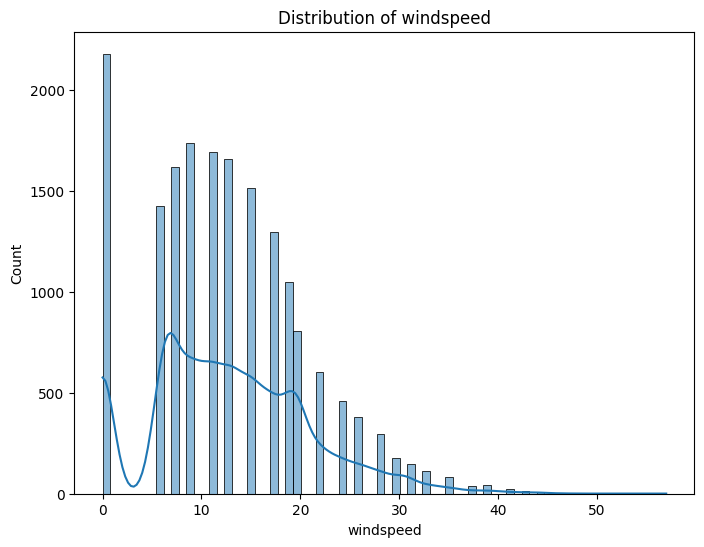

In [219]:
for column in hour_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hour_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pola yang dapat diamati dalam total penyewaan sepeda pada berbagai bulan dan waktu tertentu?

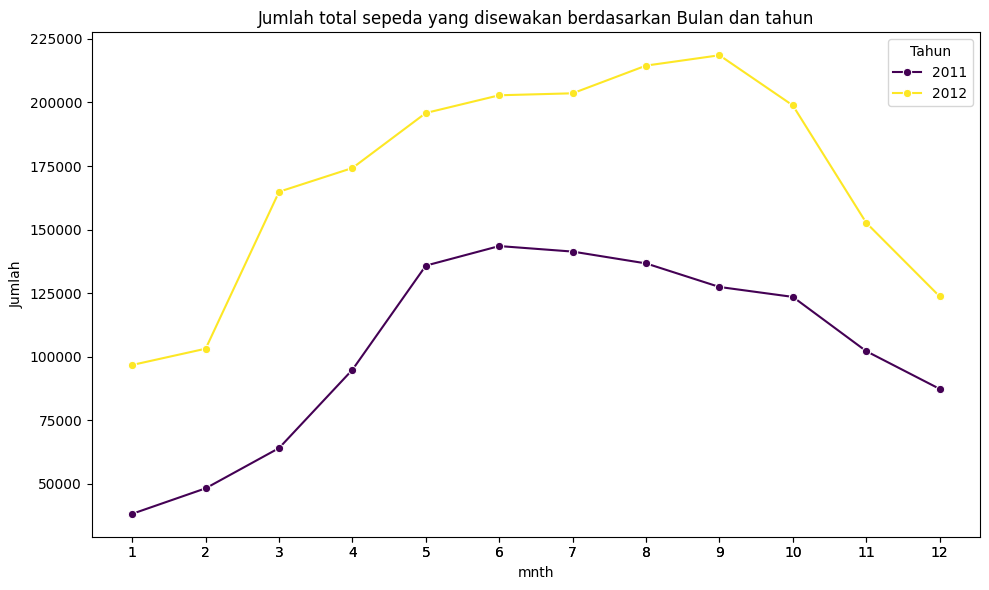

In [220]:
monthly_counts = bike_day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()

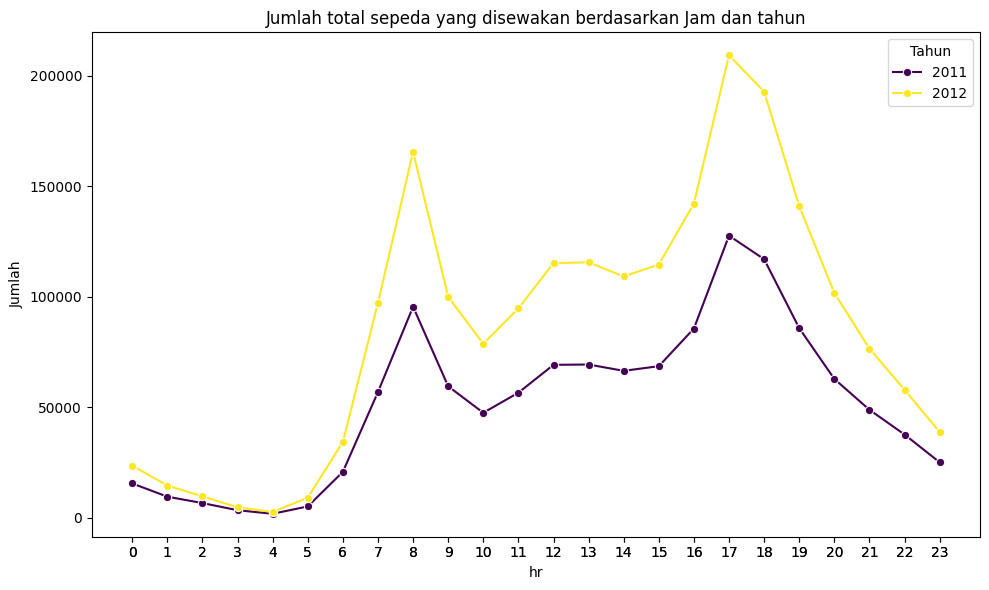

In [221]:
hourly_counts = bike_hour_df.groupby(by=["hr","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x="hr", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Jam dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=hourly_counts["hr"], labels=hourly_counts["hr"])
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa besar dampak jumlah penyewaan sepeda saat hari libur dibandingkan dengan hari biasa?

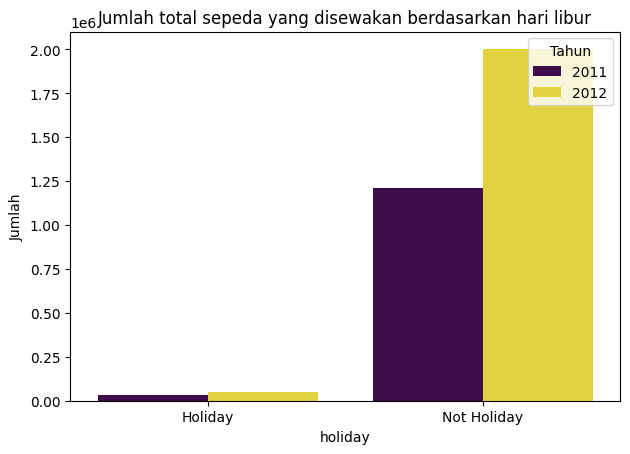

In [222]:
holiday_counts = bike_day_df.groupby(by=["holiday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=holiday_counts, x="holiday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari libur")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Berapa besar dampak jumlah penyewaan sepeda saat hari kerja dibandingkan dengan hari libur?

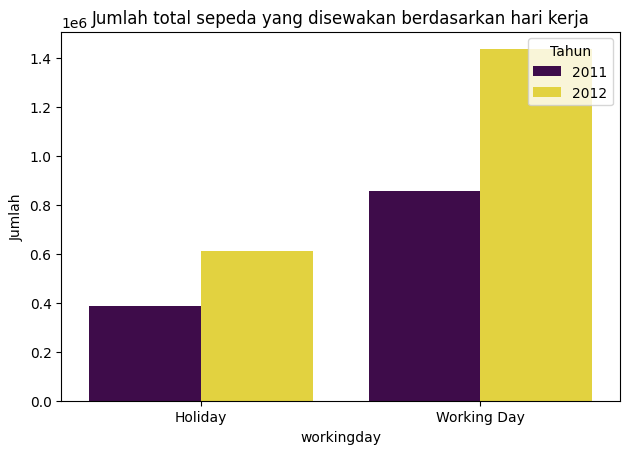

In [223]:
working_counts = bike_day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

## Conclusion

- **Conclution pertanyaan 1** = From the analysis of the "minth" column in the bike_day_df dataframe, it can be seen that September 2012 had the highest number of bicycle rentals. Meanwhile, in 2011, the month with the highest number of rentals was June. This pattern shows variations in bicycle rental patterns during different months and times.

- **Conclution pertanyaan 2** = Analysis of the "hour" column in the bike_hour_df dataframe shows that 17.00 or 5 pm is the time with the highest number of bicycle rentals. However, in the morning before noon, especially at 08.00, there is also a significant spike in the number of rentals.

- **Conclution pertanyaan 3** = Significant differences can be seen between weekdays and holidays in terms of the number of bicycle rentals, based on data visualization in the bike_day_df dataframe. In general, rental amounts are higher on weekdays than on holidays.

In [228]:
# Mengonversi kolom "date" dalam bike_day_df menjadi tipe data datetime
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])

# Mengonversi kolom "dteday" dalam bike_hour_df menjadi tipe data datetime
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

#proses merge
all_data = pd.merge(
    left=bike_day_df,
    right=bike_hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,2,14.110847,...,Saturday,Holiday,1,9.84,14.395,81.0,0.0,3,13,16
1,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,2,14.110847,...,Saturday,Holiday,1,9.02,13.635,80.0,0.0,8,32,40
2,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,2,14.110847,...,Saturday,Holiday,1,9.02,13.635,80.0,0.0,5,27,32
3,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,2,14.110847,...,Saturday,Holiday,1,9.84,14.395,75.0,0.0,3,10,13
4,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,2,14.110847,...,Saturday,Holiday,1,9.84,14.395,75.0,0.0,0,1,1


In [229]:
all_data.to_csv("all_data.csv", index=False)